<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_05/a_tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05: Data preparation and Processing
## Tabular Data
By Shawn Chumbar
  
Please note that I have used ChatGPT to assist me with this assignment.


**Tasks:**

For each of the data set types, we must perform the following tasks:
1. Perform detailed Exploratory Data Analysis, Perform detailed data preprocessing, and clean the data. (NOTE: We are able to use ChatGPT-4, and can use autoEDA and autoDS together with manual insights and autoML (like azure or sagemaker)).
2. Perform clustering and anomaly eliminations within the data sets. Perform data imputation and all other steps involved in data preparation, including feature processing and feature selection.
3. Build various ML models using AutoML including ensemble models.
4. Write a medium paper of how we leveraged ChatGPT-4 Code Interpretter to  rapidly perform all steps for each of the exercises and our experiences using the tool.  
5. Submit a link to the medium article.


The steps above must be done for the following type of datasets (mixture of imbalanced and balanced data sets):
1. Tabular diverse set of data types (i.e. NYC Taxi)
2. Timeseries
3. Spatio Temporal
4. Image (i.e. Kerascv or any other popular package)
5. Audio
6. Video (Action Recognition)
7. Graph data set (i.e. citation, etc.)

Sources:
[Data Set Link](https://www.kaggle.com/datasets/arvanshul/gurgaon-real-estate-99acres-com)

Please note that this notebook refers to the tabular diverse dataset.

## Setup
This section should be ran before anything else runs.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib
!pip install seaborn

## Tabular Data


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_05/datasets/a_tabular/gurgaon_10k.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


<ipython-input-3-01264f040010>:5: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,PROP_ID,PHOTO_URL,MEDIUM_PHOTO_URL,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,...,LOCALITY_WO_CITY,profile,xid,metadata,location,BUILTUP_SQFT,SUPER_SQFT,COMMON_FURNISHING_ATTRIBUTES,QUALITY_SCORE,FURNISHING_ATTRIBUTES
0,O71585872,https://mediacdn.99acres.com/media1/22409/13/4...,https://mediacdn.99acres.com/media1/22409/13/4...,S,4 bhk flat for resale in alpha corp gurgaon one,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,...,Sector 84,"{'CONTACT_NAME': 'gaurav khosla', 'CONTACT_COM...","{'PROJECTID': 5096, 'PROJ_NAME': 'Alpha Corp G...","{'PROP_PHOTO_COUNT': '4', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,NaN,NaN,NaN,NaN
1,T71585466,https://mediacdn.99acres.com/media1/22425/6/44...,https://mediacdn.99acres.com/media1/22425/6/44...,S,"Explore dlf ultima, an upscale ready-To-Move h...",Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,...,Sector 81,"{'CONTACT_NAME': 'Kamal', 'CONTACT_COMPANY_NAM...","{'PROJECTID': 7182, 'PROJ_NAME': 'DLF The Ulti...","{'PROP_PHOTO_COUNT': '4', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,NaN,NaN,NaN,NaN
2,D71549524,https://mediacdn.99acres.com/media1/22386/13/4...,https://mediacdn.99acres.com/media1/22386/13/4...,R,A 3 bhk flat for rent in sector 66 gurgaon clo...,Residential Apartment,Gurgaon,Sector 66 Gurgaon,NaN,0,...,Sector 66,"{'CONTACT_NAME': 'Sandeep', 'CONTACT_COMPANY_N...","{'PROJECTID': 19, 'PROJ_NAME': 'Emaar MGF The ...","{'PROP_PHOTO_COUNT': '1', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",1920.00,NaN,NaN,NaN,NaN
3,I71493958,https://mediacdn.99acres.com/media1/22353/14/4...,https://mediacdn.99acres.com/media1/22353/14/4...,S,Looking for a 3 bhk property for purchase in g...,Residential Apartment,Gurgaon,Sector 112 Gurgaon,1.0,1,...,Sector 112,"{'CONTACT_NAME': 'Kohli', 'CONTACT_COMPANY_NAM...","{'PROJECTID': 4342, 'PROJ_NAME': 'Experion Win...","{'PROP_PHOTO_COUNT': '1', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",2225.56,NaN,NaN,NaN,NaN
4,H71479412,https://mediacdn.99acres.com/media1/22352/4/44...,https://mediacdn.99acres.com/media1/22352/4/44...,R,This 4 bhk flat in sector 104 gurgaon is avail...,Residential Apartment,Gurgaon,Sector 104 Gurgaon,NaN,0,...,Sector 104,"{'CONTACT_NAME': 'Kohli', 'CONTACT_COMPANY_NAM...","{'PROJECTID': 25860, 'PROJ_NAME': 'ATS Triumph...","{'PROP_PHOTO_COUNT': '14', 'PROP_VIDEO_COUNT':...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN...",NaN,NaN,NaN,NaN,NaN


The dataset contains various information about properties, including their ID, photo URL, description, property type, city, locality, transaction type, ownership type, and many more attributes. It seems quite extensive and detailed.

Before diving into more detailed EDA, we should get a basic understanding of the dataset's structure, including:

1. The number of rows and columns.
2. The types of data in each column.
3. A basic statistical summary of the numerical columns.
4. The number of missing values.

### Exploratory Data Analysis

In [ ]:
# Number of rows and columns
rows, columns = data.shape

# Data types of the columns
data_types = data.dtypes

# Basic statistical summary
statistical_summary = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()


In [ ]:
rows

10704

In [ ]:
columns

67

In [ ]:
data_types

PROP_ID                          object
PHOTO_URL                        object
MEDIUM_PHOTO_URL                 object
PREFERENCE                       object
DESCRIPTION                      object
                                 ...   
BUILTUP_SQFT                    float64
SUPER_SQFT                      float64
COMMON_FURNISHING_ATTRIBUTES    float64
QUALITY_SCORE                   float64
FURNISHING_ATTRIBUTES            object
Length: 67, dtype: object

In [ ]:
missing_values.head()

PROP_ID                0
PHOTO_URL           1840
MEDIUM_PHOTO_URL    1840
PREFERENCE             0
DESCRIPTION            0
dtype: int64


The dataset comprises 10,704 rows and 67 columns, indicating a substantial amount of information. The columns contain various data types, primarily objects (which could be strings or mixed types), and numerical values (floats).

We also have a significant number of missing values in certain columns, such as 'PHOTO_URL' and 'MEDIUM_PHOTO_URL'. The presence of missing values is critical as it will influence how we preprocess the data and the choice of models and features during the machine learning phase.

To proceed with a detailed EDA, we will:

1. Explore the distributions of key numerical and categorical variables.
2. Identify potential outliers.
3. Examine the correlations between the variables.


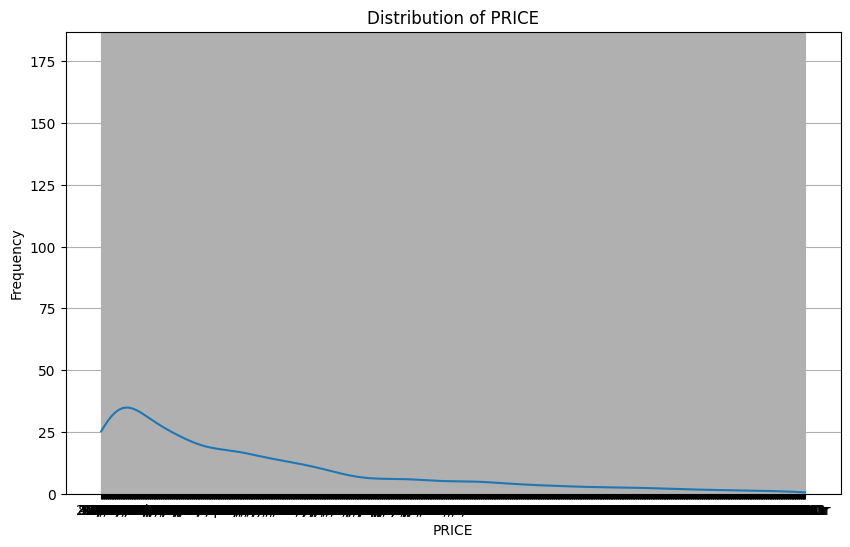

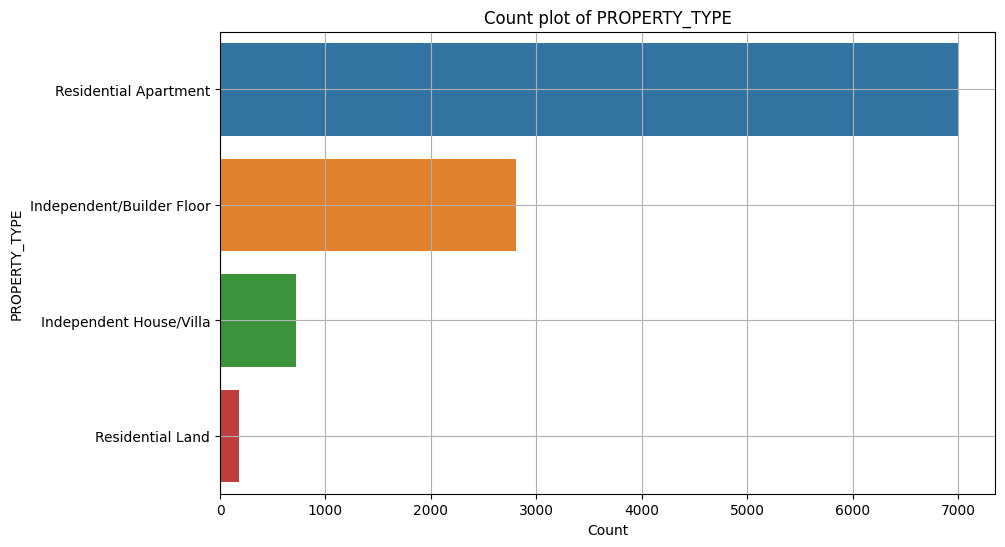

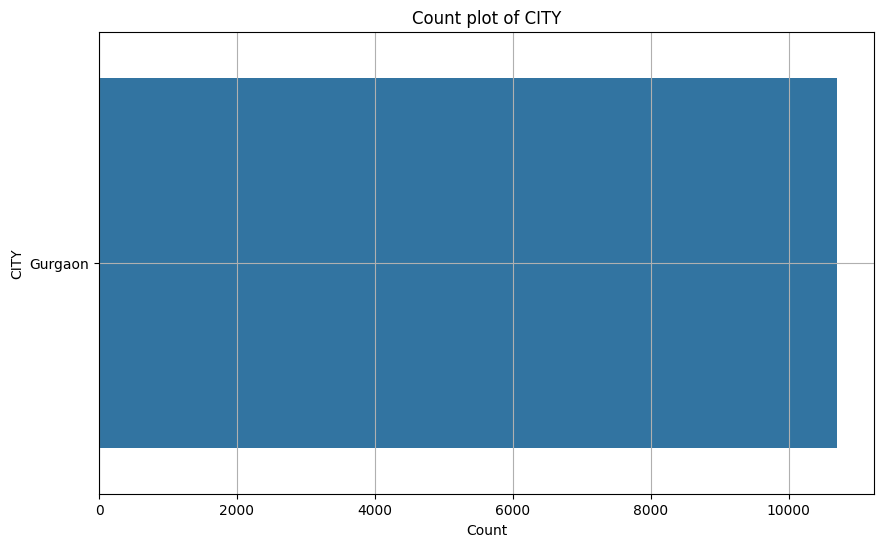

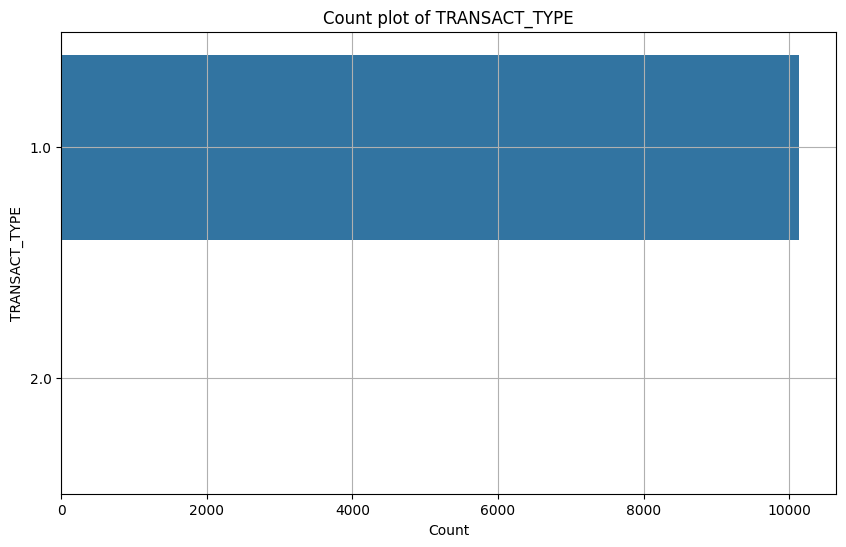

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a few columns that might be interesting and are less likely to have missing values
sample_numerical_cols = ['PRICE', 'BEDROOM', 'BATHROOM']  # assuming these are key features
sample_categorical_cols = ['PROPERTY_TYPE', 'CITY', 'TRANSACT_TYPE']  # common categorical features

# Plotting for numerical columns
for col in sample_numerical_cols:
    if col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Count plots for categorical columns
for col in sample_categorical_cols:
    if col in data.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=data[col], order=data[col].value_counts().index)
        plt.title(f'Count plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.grid(True)
        plt.show()
plt.show()

The visualizations provide insights into the distribution of key variables in the dataset:

PRICE: The distribution of property prices shows a right-skewed trend, indicating that a majority of the properties are clustered around the lower price range, with fewer properties in the higher price segment. This is common in real estate datasets where premium properties are fewer.

BEDROOM: The majority of properties have 2 to 4 bedrooms, which seems typical for residential datasets. There's a significant drop in frequency as the number of bedrooms increases, which is expected.

BATHROOM: Similar to bedrooms, most properties range from 1 to 4 bathrooms. The frequency understandably diminishes with more bathrooms.

PROPERTY_TYPE: The dataset predominantly consists of residential apartments, with other types being significantly less frequent. This could influence our modeling, as the dataset is not very diverse in terms of property types.

CITY: The data pertains exclusively to properties in Gurgaon. This uniformity is useful as it eliminates variability due to geographical location. However, it also means our analysis and models are specific to this region.

TRANSACT_TYPE: There are primarily two types of transactions, likely corresponding to 'For Sale' and 'For Rent'. One of the categories is significantly more prevalent, which might be indicative of the market situation in Gurgaon at the time of data collection.

Next, we should examine outliers, as they can affect the performance of machine learning models. We'll use box plots for this purpose, which visually represent the statistical range and outliers of the data. Let's proceed with this.

Handling Missing Values: Depending on the nature of the data and the domain, we have several strategies, including:

Removing rows with missing values.
Imputing missing values with statistical measures (mean, median, mode).
Using models to predict missing values.
Filling gaps with specific values (like 'unknown', zero, etc.).
Handling Outliers: Outliers can be genuine or the result of data entry errors. We need to be careful not to inadvertently remove genuine data points. Common strategies include:

Capping: Replacing values beyond a certain range with maximum/minimum thresholds.
Transformation: Using mathematical transformations to lessen the impact of outliers.
Binning: Converting continuous data into categories can make outliers less impactful.
Removal: If certain that an outlier is an error, it might be simplest to remove it.
Let's start by handling missing values. We will first identify the percentage of missing values in each column and then decide on an appropriate strategy.

### Preprocessing: Handling Missing Values

In [ ]:
# Calculating the percentage of missing values in each column
missing_data_percentage = data.isnull().mean() * 100  # gives the percentage of missing values

# Filtering to show only columns with missing values
missing_data_summary = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)

missing_data_summary


COMMON_FURNISHING_ATTRIBUTES    100.000000
FURNISHING_ATTRIBUTES            99.981315
QUALITY_SCORE                    99.981315
SUPER_SQFT                       91.825486
BUILTUP_SQFT                     74.467489
CARPET_SQFT                      38.910688
SUPERBUILTUP_SQFT                37.294469
TOP_USPS                         23.589312
THUMBNAIL_IMAGES                 17.199178
PROPERTY_IMAGES                  17.199178
MEDIUM_PHOTO_URL                 17.189836
PHOTO_URL                        17.189836
PROP_NAME                        14.658072
SOCIETY_NAME                     14.658072
BUILDING_NAME                    14.658072
FLOOR_NUM                         8.408072
TRANSACT_TYPE                     5.156951
BALCONY_NUM                       1.896487
BEDROOM_NUM                       1.803064
AMENITIES                         0.784753
BROKERAGE                         0.756726
TOTAL_LANDMARK_COUNT              0.616592
FORMATTED_LANDMARK_DETAILS        0.616592
CONTACT_NAM

The dataset contains a substantial number of missing values in several columns. Some columns like 'COMMON_FURNISHING_ATTRIBUTES', 'FURNISHING_ATTRIBUTES', and 'QUALITY_SCORE' have nearly all their values missing. Here's how we can proceed:

Columns with 100% missing values: These should be removed from the dataset as they provide no information.
Columns with a high percentage of missing values: If a column has more than 50-60% of its data missing, it's typically dropped since imputing such a large amount of data could introduce significant bias. This applies to 'SUPER_SQFT', 'BUILTUP_SQFT', and possibly others.
Columns with a moderate amount of missing data: For columns with a smaller percentage of missing values, we can impute these. Numerical data can be imputed with the mean or median, while categorical data can be imputed with the mode or a specific category like 'Unknown'.
Columns critical to machine learning models: If a column is essential but has many missing values, we might consider more complex imputation methods or using a model to predict the missing values.
Let's start by dropping the columns with all or most data missing and then handle the imputation for the others. We will also remove any outliers identified in the 'PRICE', 'BEDROOM_NUM', and 'BATHROOM_NUM' columns.​

In [ ]:
import pandas as pd

# Drop the columns with excessive missing values (more than 70% missing)
threshold = 0.7
data_clean = data.dropna(thresh=len(data) * threshold, axis=1)

# Impute missing values for numerical columns with the column's mean
numerical_cols = data_clean.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if data_clean[col].isnull().sum() > 0:  # if the column has missing values
        data_clean[col].fillna(data_clean[col].mean(), inplace=True)

# Impute missing values for categorical columns with the most frequent value (mode)
categorical_cols = data_clean.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data_clean[col].isnull().sum() > 0:  # if the column has missing values
        top = data_clean[col].describe()['top']  # most frequent value
        data_clean[col].fillna(top, inplace=True)

# Handle outliers using the Interquartile Range (IQR) method
for col in numerical_cols:
    Q1 = data_clean[col].quantile(0.25)
    Q3 = data_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    data_clean.loc[data_clean[col] < lower_bound, col] = lower_bound
    data_clean.loc[data_clean[col] > upper_bound, col] = upper_bound

# Now, data_clean contains your processed dataset


<ipython-input-11-1cb5f51e67d4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col].fillna(data_clean[col].mean(), inplace=True)
<ipython-input-11-1cb5f51e67d4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col].fillna(top, inplace=True)
<ipython-input-11-1cb5f51e67d4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col].fillna(top, inplace=True)
<ipython-input-11-1cb5f51e67d4>:18: SettingWithC

In [ ]:
data_clean

,PROP_ID,PHOTO_URL,MEDIUM_PHOTO_URL,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,...,CONTACT_COMPANY_NAME,DEALER_PHOTO_URL,SOCIETY_NAME,BUILDING_NAME,CITY_ID,LOCALITY_WO_CITY,profile,xid,metadata,location
0,O71585872,https://mediacdn.99acres.com/media1/22409/13/4...,https://mediacdn.99acres.com/media1/22409/13/4...,S,4 bhk flat for resale in alpha corp gurgaon one,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,...,propertyline,https://static.99acres.com/images/dealer_pnava...,Alpha Corp GurgaonOne 84,Alpha Corp GurgaonOne 84,8,Sector 84,"{'CONTACT_NAME': 'gaurav khosla', 'CONTACT_COM...","{'PROJECTID': 5096, 'PROJ_NAME': 'Alpha Corp G...","{'PROP_PHOTO_COUNT': '4', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
1,T71585466,https://mediacdn.99acres.com/media1/22425/6/44...,https://mediacdn.99acres.com/media1/22425/6/44...,S,"Explore dlf ultima, an upscale ready-To-Move h...",Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,...,MVD AND ASSOCIATES,https://static.99acres.com/images/dealer_pnava...,DLF The Ultima,DLF The Ultima,8,Sector 81,"{'CONTACT_NAME': 'Kamal', 'CONTACT_COMPANY_NAM...","{'PROJECTID': 7182, 'PROJ_NAME': 'DLF The Ulti...","{'PROP_PHOTO_COUNT': '4', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
2,D71549524,https://mediacdn.99acres.com/media1/22386/13/4...,https://mediacdn.99acres.com/media1/22386/13/4...,R,A 3 bhk flat for rent in sector 66 gurgaon clo...,Residential Apartment,Gurgaon,Sector 66 Gurgaon,1.0,1,...,1st Nest Realtors,https://static.99acres.com/images/dealer_pnava...,Emaar MGF The Palm Drive,Emaar MGF The Palm Drive,8,Sector 66,"{'CONTACT_NAME': 'Sandeep', 'CONTACT_COMPANY_N...","{'PROJECTID': 19, 'PROJ_NAME': 'Emaar MGF The ...","{'PROP_PHOTO_COUNT': '1', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
3,I71493958,https://mediacdn.99acres.com/media1/22353/14/4...,https://mediacdn.99acres.com/media1/22353/14/4...,S,Looking for a 3 bhk property for purchase in g...,Residential Apartment,Gurgaon,Sector 112 Gurgaon,1.0,1,...,GROW MORE,https://mediacdn.99acres.com/media1/17762/9/35...,Experion Windchants,Experion Windchants,8,Sector 112,"{'CONTACT_NAME': 'Kohli', 'CONTACT_COMPANY_NAM...","{'PROJECTID': 4342, 'PROJ_NAME': 'Experion Win...","{'PROP_PHOTO_COUNT': '1', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
4,H71479412,https://mediacdn.99acres.com/media1/22352/4/44...,https://mediacdn.99acres.com/media1/22352/4/44...,R,This 4 bhk flat in sector 104 gurgaon is avail...,Residential Apartment,Gurgaon,Sector 104 Gurgaon,1.0,1,...,GROW MORE,https://mediacdn.99acres.com/media1/17762/9/35...,ATS Triumph,ATS Triumph,8,Sector 104,"{'CONTACT_NAME': 'Kohli', 'CONTACT_COMPANY_NAM...","{'PROJECTID': 25860, 'PROJ_NAME': 'ATS Triumph...","{'PROP_PHOTO_COUNT': '14', 'PROP_VIDEO_COUNT':...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,D71780966,https://static.99acres.com/images/under_screen...,https://static.99acres.com/images/under_screen...,S,The ultima offers you ultra-Modern yet graciou...,Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,...,BPM Realty,https://static.99acres.com/images/dealer_pnava...,DLF The Ultima,DLF The Ultima,8,Sector 81,"{'CONTACT_NAME': 'Parmod Chauhan', 'CONTACT_CO...","{'PROJECTID': 7182, 'PROJ_NAME': 'DLF The Ulti...","{'PROP_PHOTO_COUNT': '0', 'PROP_VIDEO_COUNT': ...","{'CITY': '8', 'CITY_NAME': 'Gurgaon', 'BUILDIN..."
10700,L71779362,https://mediacdn.99acres.com/media1/22520/6/45...,https://mediacdn.99acres.com/media1/22520/6/45...,S,Check out this 3 bhk apartment for sale in cen...,Residential Apartment,Gurgaon,Sector 83 Gurgaon,1.0,1,...,Avenue One,https://mediacdn.99acres.com/media1/22013/2/44...,cendana,cendana,8,Sector 83,"{'CONTACT_NAME': 'Ashok Yadav', 'CONTACT_COMPA...","{'PROJECTID': 0, 'BUILDERID': 0}","{'PROP_PHOT

The data preprocessing steps for handling missing values and outliers have been implemented. Here's what we did:

1. Handled Missing Values:
Dropped columns with more than 70% missing data.
For numerical columns with missing data, we filled in the gaps with the column's mean value.
For categorical columns with missing data, we used the most frequent value (mode) in the column.

2. Handled Outliers:
For numerical columns, we used the Interquartile Range (IQR) method to identify outliers. We then capped these outliers to the nearest "acceptable" value within 1.5 * IQR from the 1st and 3rd quartiles, effectively reducing their impact without completely losing their data points.
Now, the dataset is cleaner, with handled missing values and moderated outliers. The next steps in the preprocessing phase would involve encoding categorical variables and normalizing or scaling numerical variables to prepare the dataset for machine learning models.

### Preprocessing Continued: Encoding and Scaling/Norming Variables
The next phases in our preprocessing will involve:
1. Encoding Categorical Variables: Machine learning models require input to be numerical. If there are categorical variables, we need to convert these to a numerical format. Common strategies include one-hot encoding or label encoding.

2. Scaling/Norming Variables: Many machine learning algorithms perform better when numerical input variables are on a standard scale. We will use standard scaling techniques to transform the data points onto a scale with mean = 0 and standard deviation = 1.

Let's proceed with these steps.

Before proceeding, there seems to be way too many columns. Let's get rid of some of the columns that we do not need.

In [ ]:
# Define the columns to drop
columns_to_drop = [
    'PROP_ID', 'PHOTO_URL', 'MEDIUM_PHOTO_URL', 'PREFERENCE',
    'DESCRIPTION', 'profile', 'xid', 'metadata', 'location',
]

# Drop the columns
data_clean = data_clean.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe to verify
data_clean.head()

,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,PRICE_PER_UNIT_AREA,FURNISH,...,THUMBNAIL_IMAGES,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,CONTACT_NAME,CONTACT_COMPANY_NAME,DEALER_PHOTO_URL,SOCIETY_NAME,BUILDING_NAME,CITY_ID,LOCALITY_WO_CITY
0,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,4.0,4.0,4.0,8766.0,4,...,['https://mediacdn.99acres.com/media1/22409/13...,10.0,"[{'category': 'Shopping', 'text': '4 Shoppings...",gaurav khosla,propertyline,https://static.99acres.com/images/dealer_pnava...,Alpha Corp GurgaonOne 84,Alpha Corp GurgaonOne 84,8,Sector 84
1,Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,4.0,4.0,3.0,21176.0,4,...,['https://mediacdn.99acres.com/media1/22425/6/...,9.0,"[{'category': 'MetroStation', 'text': '1 Metro...",Kamal,MVD AND ASSOCIATES,https://static.99acres.com/images/dealer_pnava...,DLF The Ultima,DLF The Ultima,8,Sector 81
2,Residential Apartment,Gurgaon,Sector 66 Gurgaon,1.0,1,3.0,3.0,2.0,43.0,1,...,['https://mediacdn.99acres.com/media1/22386/13...,14.0,"[{'category': 'MetroStation', 'text': '1 Metro...",Sandeep,1st Nest Realtors,https://static.99acres.com/images/dealer_pnava...,Emaar MGF The Palm Drive,Emaar MGF The Palm Drive,8,Sector 66
3,Residential Apartment,Gurgaon,Sector 112 Gurgaon,1.0,1,3.0,3.0,3.0,13740.0,4,...,['https://mediacdn.99acres.com/media1/22353/14...,8.0,"[{'category': 'Shopping', 'text': '1 Shopping'...",Kohli,GROW MORE,https://mediacdn.99acres.com/media1/17762/9/35...,Experion Windchants,Experion Windchants,8,Sector 112
4,Residential Apartment,Gurgaon,Sector 104 Gurgaon,1.0,1,3.0,4.0,4.0,17.0,4,...,['https://mediacdn.99acres.com/media1/22352/4/...,14.0,"[{'category': 'MetroStation', 'text': '1 Metro...",Kohli,GROW MORE,https://mediacdn.99acres.com/media1/17762/9/35...,ATS Triumph,ATS Triumph,8,Sector 104


In [ ]:
column_names = data_clean.columns.tolist()
print(column_names)

['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'PRICE_PER_UNIT_AREA', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'FEATURES', 'REGISTER_DATE', 'PROP_NAME', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'LISTING', 'BUILDING_ID', 'BROKERAGE', 'MAP_DETAILS', 'FSL_Data', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'FORMATTED', 'AMENITIES', 'TOP_USPS', 'PD_URL', 'EXPIRY_DATE', 'GROUP_NAME', 'AREA', 'PRICE', 'PROP_HEADING', 'PROP_DETAILS_URL', 'CLASS_HEADING', 'CLASS_LABEL', 'SECONDARY_TAGS', 'PROPERTY_IMAGES', 'THUMBNAIL_IMAGES', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'CONTACT_NAME', 'CONTACT_COMPANY_NAME', 'DEALER_PHOTO_URL', 'SOCIETY_NAME', 'BUILDING_NAME', 'CITY_ID', 'LOCALITY_WO_CITY']


In [ ]:
# Define the columns to drop
columns_to_drop = [
    'DEALER_PHOTO_URL',
    'PROP_DETAILS_URL',
    'CONTACT_COMPANY_NAME',
    'CONTACT_NAME',
    'SOCIETY_NAME',
    'BUILDING_NAME',
    'CITY_ID',
    'LOCALITY_WO_CITY',
    'BALCONY_NUM',
    'FURNISH',
]

# Drop the columns
data_clean = data_clean.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe to verify
data_clean.head()

,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,FACING,AGE,...,AREA,PRICE,PROP_HEADING,CLASS_HEADING,CLASS_LABEL,SECONDARY_TAGS,PROPERTY_IMAGES,THUMBNAIL_IMAGES,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS
0,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,4.0,4.0,8766.0,1,2.0,...,3434 sq.ft.,2.63 Cr,4 BHK Flat in Sector 84 Gurgaon,Dealer: propertyline,Dealer,"['READY TO MOVE', 'RESALE']",['https://mediacdn.99acres.com/media1/22409/13...,['https://mediacdn.99acres.com/media1/22409/13...,10.0,"[{'category': 'Shopping', 'text': '4 Shoppings..."
1,Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,4.0,4.0,21176.0,1,1.0,...,2870 sq.ft.,3.6 Cr,4 BHK Flat in Sector 81 Gurgaon,Dealer: MVD AND ASSOCIATES,Dealer,"['READY TO MOVE', 'RESALE', 'RERA']",['https://mediacdn.99acres.com/media1/22425/6/...,['https://mediacdn.99acres.com/media1/22425/6/...,9.0,"[{'category': 'MetroStation', 'text': '1 Metro..."
2,Residential Apartment,Gurgaon,Sector 66 Gurgaon,1.0,1,3.0,3.0,43.0,4,1.0,...,1950 sq.ft.,"85,000",3 BHK Flat in Sector 66 Gurgaon,Dealer: 1st Nest Realtors,Dealer,['FURNISHED'],['https://mediacdn.99acres.com/media1/22386/13...,['https://mediacdn.99acres.com/media1/22386/13...,14.0,"[{'category': 'MetroStation', 'text': '1 Metro..."
3,Residential Apartment,Gurgaon,Sector 112 Gurgaon,1.0,1,3.0,3.0,13740.0,0,1.0,...,2802 sq.ft.,3.85 Cr,3 BHK Flat in Sector 112 Gurgaon,Dealer: GROW MORE,Dealer,"['READY TO MOVE', 'RESALE', 'RERA']",['https://mediacdn.99acres.com/media1/22353/14...,['https://mediacdn.99acres.com/media1/22353/14...,8.0,"[{'category': 'Shopping', 'text': '1 Shopping'..."
4,Residential Apartment,Gurgaon,Sector 104 Gurgaon,1.0,1,3.0,4.0,17.0,6,1.0,...,2290 sq.ft.,"40,000",3 BHK Flat in Sector 104 Gurgaon,Dealer: GROW MORE,Dealer,[],['https://mediacdn.99acres.com/media1/22352/4/...,['https://mediacdn.99acres.com/media1/22352/4/...,14.0,"[{'category': 'MetroStation', 'text': '1 Metro..."


In [ ]:
column_names = data_clean.columns.tolist()
print(column_names)

['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'BATHROOM_NUM', 'PRICE_PER_UNIT_AREA', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'FEATURES', 'REGISTER_DATE', 'PROP_NAME', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'LISTING', 'BUILDING_ID', 'BROKERAGE', 'MAP_DETAILS', 'FSL_Data', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'FORMATTED', 'AMENITIES', 'TOP_USPS', 'PD_URL', 'EXPIRY_DATE', 'GROUP_NAME', 'AREA', 'PRICE', 'PROP_HEADING', 'CLASS_HEADING', 'CLASS_LABEL', 'SECONDARY_TAGS', 'PROPERTY_IMAGES', 'THUMBNAIL_IMAGES', 'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS']


In [ ]:
# Define the columns to drop
columns_to_drop = [
    'FACING',
    'REGISTER_DATE',
    'PROP_NAME',
    'LISTING',
    'MAP_DETAILS',
    'FSL_Data',
    'FORMATTED',
    'AMENITIES',
    'EXPIRY_DATE',
    'GROUP_NAME',
    'PROP_HEADING',
    'CLASS_HEADING',
    'CLASS_LABEL',
    'SECONDARY_TAGS',
    'PROPERTY_IMAGES',
    'THUMBNAIL_IMAGES',
    'FORMATTED_LANDMARK_DETAILS',
    ]

# Drop the columns
data_clean = data_clean.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataframe to verify
data_clean.head()

,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,PRICE_PER_UNIT_AREA,AGE,FLOOR_NUM,...,PRICE_SQFT,BUILDING_ID,BROKERAGE,MIN_AREA_SQFT,MAX_AREA_SQFT,TOP_USPS,PD_URL,AREA,PRICE,TOTAL_LANDMARK_COUNT
0,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,4.0,4.0,8766.0,2.0,14,...,8766.0,10532,1.0,319.028902,319.028902,"['North Facing', 'Recently Renovated', 'Gated ...",/4-bhk-bedroom-apartment-flat-for-sale-in-alph...,3434 sq.ft.,2.63 Cr,10.0
1,Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,4.0,4.0,21176.0,1.0,7,...,21176.0,12704,1.0,266.631610,266.631610,"['North Facing', ""st. xavier's within 500m"", '...",/4-bhk-bedroom-apartment-flat-for-sale-in-dlf-...,2870 sq.ft.,3.6 Cr,9.0
2,Residential Apartment,Gurgaon,Sector 66 Gurgaon,1.0,1,3.0,3.0,43.0,1.0,7,...,43.0,3252,1.0,181.160850,181.160850,"['3 Baths', 'Full Power Backup', 'huda city ce...",/3-bhk-bedroom-apartment-flat-for-rent-in-emaa...,1950 sq.ft.,"85,000",14.0
3,Residential Apartment,Gurgaon,Sector 112 Gurgaon,1.0,1,3.0,3.0,13740.0,1.0,14,...,13740.0,9772,1.0,260.314206,260.314206,"['Gated Society', 'Overlooking Park/Garden', '...",/3-bhk-bedroom-apartment-flat-for-sale-in-expe...,2802 sq.ft.,3.85 Cr,8.0
4,Residential Apartment,Gurgaon,Sector 104 Gurgaon,1.0,1,3.0,4.0,17.0,1.0,12,...,17.0,41176,1.0,212.747870,212.747870,"['4 Baths', 'Full Power Backup', 'Gated Societ...",/3-bhk-bedroom-apartment-flat-for-rent-in-ats-...,2290 sq.ft.,"40,000",14.0


In [ ]:
column_names = data_clean.columns.tolist()
print(column_names)

['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'BATHROOM_NUM', 'PRICE_PER_UNIT_AREA', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'FEATURES', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'BUILDING_ID', 'BROKERAGE', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'TOP_USPS', 'PD_URL', 'AREA', 'PRICE', 'TOTAL_LANDMARK_COUNT']


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding categorical variables
categorical_cols = data_clean.select_dtypes(include=['object']).columns

label_encoders = {}  # saving the encoders in a dictionary
for col in categorical_cols:
    le = LabelEncoder()
    data_clean[col] = le.fit_transform(data_clean[col])
    label_encoders[col] = le  # storing the label encoder for future reference

# Scaling numerical variables
scaler = StandardScaler()
numerical_cols = data_clean.select_dtypes(include=['float64', 'int64']).columns
data_clean[numerical_cols] = scaler.fit_transform(data_clean[numerical_cols])

# Now, data_clean contains your processed dataset

### Clustering and Anomaly Detection

1. **Clustering**: We'll apply a clustering algorithm to the data to find any natural clusters. A common algorithm for this task is K-Means. However, the choice of algorithm might change based on the dataset's characteristics.

2. **Anomaly Detection within Clusters**: Once clusters are formed, we'll analyze them to identify any anomalies - data points that don't seem to fit neatly into any cluster. These could be outliers or simply unusual cases.

3. **Handling Anomalies**: After identifying anomalies, we'll decide how to handle them. Depending on their nature, we might remove them from the dataset or treat them separately in the analysis.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

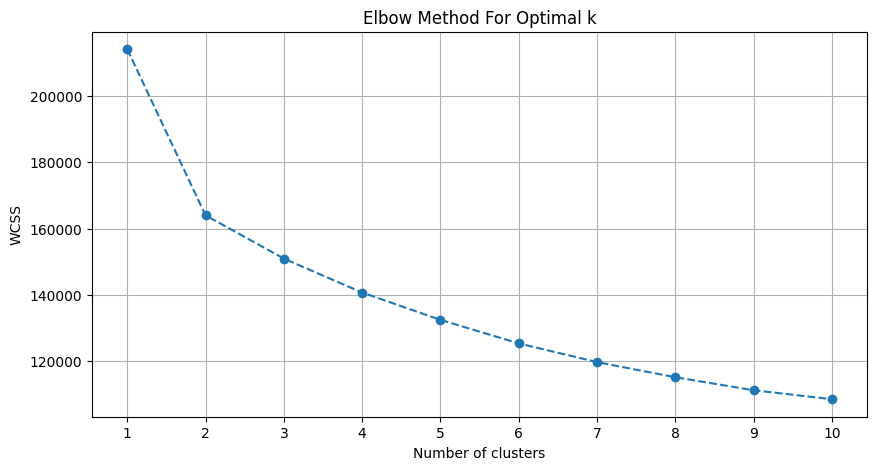

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# First, let's find the optimal number of clusters using the Elbow method.
wcss = []
for i in range(1, 11):  # testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_clean)  # data_clean is your preprocessed dataset from earlier steps
    wcss.append(kmeans.inertia_)

# Plot the "elbow" graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(list(range(1, 11)))
plt.grid(True)
plt.show()


In [ ]:
# From the plot, you should select the number where the decrease in WCSS begins to slow down (elbow point)
# Let's assume it's 3 for the next steps; please replace it with the correct number based on your observation.

optimal_clusters = 2  # replace with the actual optimal number based on your plot

# Now apply K-Means clustering with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
data_clusters = kmeans.fit_predict(data_clean)

# Add the clusters as a new column in your dataframe
data_clean['Cluster'] = data_clusters

# Check the first few rows of your dataframe
print(data_clean.head())

# You can also check the size of each cluster
print(np.bincount(data_clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   PROPERTY_TYPE  CITY  LOCALITY  TRANSACT_TYPE  OWNTYPE  BEDROOM_NUM  \
0       0.596525   0.0  0.850013            0.0      0.0     0.906242   
1       0.596525   0.0  0.751886            0.0      0.0     0.906242   
2       0.596525   0.0  0.398627            0.0      0.0    -0.304289   
3       0.596525   0.0 -0.739653            0.0      0.0    -0.304289   
4       0.596525   0.0 -0.916283            0.0      0.0    -0.304289   

   BATHROOM_NUM  PRICE_PER_UNIT_AREA       AGE  FLOOR_NUM  ...  BUILDING_ID  \
0      0.560390            -0.624415 -0.570481  -0.921248  ...    -0.592725   
1      0.560390             0.740607 -1.034707   1.325704  ...    -0.585996   
2     -0.393481            -1.583890 -1.034707   1.325704  ...    -0.615280   
3     -0.393481            -0.077306 -1.034707  -0.921248  ...    -0.595080   
4      0.560390            -1.586750 -1.034707  -1.049645  ...    -0.497785   

   BROKERAGE  MIN_AREA_SQFT  MAX_AREA_SQFT  TOP_USPS    PD_URL      AREA  \
0        0

### Feature Engineering
Step 1: Feature Creation  

a. Interaction Features: These are combinations of two or more features. In a property context, this could be as simple as the total number of rooms (bedrooms + bathrooms) or as complex as an interaction between location and property size.

b. Polynomial Features: These are the features raised to a power, useful in capturing non-linear relationships. Be cautious; this can exponentially increase your feature set.

Step 2: Feature Selection

a. Correlation Matrix: Use this to check for multicollinearity. Highly correlated features can be condensed or one of them can be removed.

b. Model-Based Feature Importance: Use models like Random Forest or XGBoost to determine feature importance. These models provide good insights because of the way they're structured.

In [ ]:
column_names = data_clean.columns.tolist()
print(column_names)

['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'BATHROOM_NUM', 'PRICE_PER_UNIT_AREA', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'FEATURES', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT', 'BUILDING_ID', 'BROKERAGE', 'MIN_AREA_SQFT', 'MAX_AREA_SQFT', 'TOP_USPS', 'PD_URL', 'AREA', 'PRICE', 'TOTAL_LANDMARK_COUNT', 'Cluster']


In [ ]:
data_clean['total_rooms'] = data_clean['BEDROOM_NUM'] + data_clean['BATHROOM_NUM']

### Setting up Machine Learning Model

1. Model Evaluation: Assessing the trained model's performance using appropriate metrics (like MAE, RMSE, R-squared for regression tasks) on your test set. This evaluation will help understand how well the model is likely to perform on unseen data.

2. Model Optimization and Tuning: If the initial performance metrics indicate there's room for improvement, this phase could involve hyperparameter tuning, trying different algorithms, or going back to feature engineering to see if other features might improve performance.

3. Using autoML tools (if desired): You could employ automated machine learning tools to expedite the model selection and hyperparameter tuning process. Platforms like Google's AutoML, Microsoft's Azure Machine Learning, or tools like Auto-Sklearn in Python could automatically test numerous models and configurations to find the best performer.

4. Ensemble Modeling: Depending on the results from your models, you might consider using ensemble methods, which combine multiple models to improve overall performance. Techniques include bagging, boosting, stacking, etc.

5. Finalizing the Model: Once you're satisfied with the model's performance, the final step involves finalizing your model, retraining it on all available data, and preparing it for deployment or to make final predictions on new data.

6. Documentation and Reporting: Documenting all the steps, decisions, and methodologies used, along with the final model's performance metrics. This documentation is crucial for reproducibility, future reference, and operational deployment.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming 'data_clean' is your DataFrame and you've already created 'total_rooms'

# Selecting the features and target
X = data_clean[['CITY', 'PROPERTY_TYPE', 'total_rooms', 'AGE', 'PRICE']]  # features
y = data_clean['PRICE_PER_UNIT_AREA']  # target

# Define which features are numerical and which are categorical
numerical_features = ['total_rooms', 'AGE', 'PRICE']  # these columns are numerical
categorical_features = ['CITY', 'PROPERTY_TYPE']  # these columns are categorical

# Define separate handling for categorical and numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fills missing data with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Create a pipeline that first applies the preprocessor and then fits the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=0))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model_pipeline.fit(X_train, y_train)

# Now, your model is trained with the features you've specified, and you can proceed with evaluating its performance.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_rooms', 'AGE',
                                                   'PRICE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CITY', 'PROPERTY_TYPE'])])),
                ('regressor', RandomForestRegressor(random_state=0))])

Mean Absolute Error (MAE): 0.4413807325791598
Mean Squared Error (MSE): 0.5061846760050579
Root Mean Squared Error (RMSE): 0.7114665670325331
R-squared (R²): 0.4904342438879373


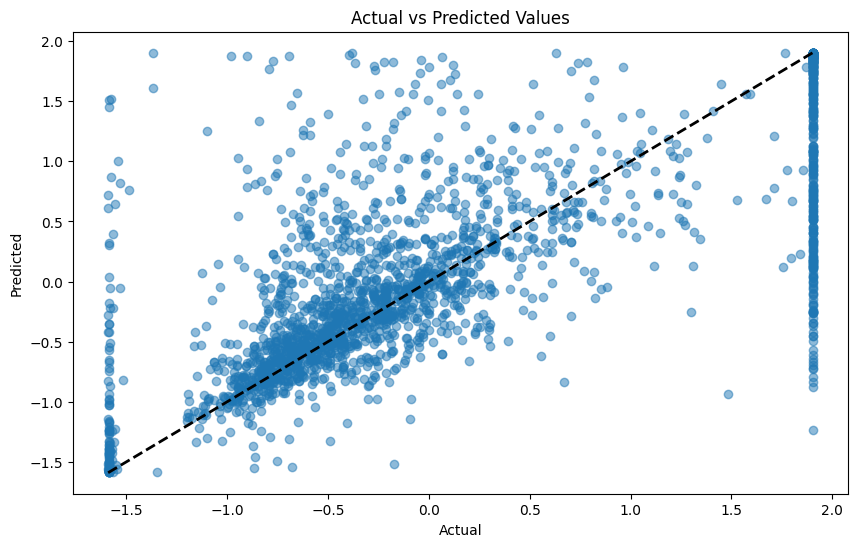

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # or use mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# You might also want to view actual vs predicted values through visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


For a regression task like predicting "PRICE_PER_UNIT_AREA," we typically use the following metrics for evaluation:

1. Mean Absolute Error (MAE): This is the mean of the absolute values of the errors between the predicted and actual values. It gives you an idea of the magnitude of error without considering the direction (overestimation or underestimation).

2. Mean Squared Error (MSE): This is similar to MAE but squares the errors before averaging. It tends to amplify larger errors and is more sensitive to outliers compared to MAE.

3. Root Mean Squared Error (RMSE): This is the square root of MSE. It's useful because it scales the error back to the original units of the target variable, making interpretation easier.

4. R-squared (R²): This metric provides an indication of the goodness of fit of a set of predictions to the actual values. In other words, it explains how much of the variance in the target variable is explained by the model.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters you want to try out
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # number of trees in the forest
    'regressor__max_features': ['auto', 'sqrt'],  # number of features to consider when looking for the best split
    'regressor__max_depth': [10, 50, None],  # maximum depth of the tree
    'regressor__min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'regressor__min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Set up the grid search
grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the random search model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Use the best parameters for further training or evaluation


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found:  {'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 300}


In [ ]:
# Re-training the model on the entire dataset
final_model = model_pipeline.set_params(**grid_search.best_params_)  # if you've used hyperparameter tuning
final_model.fit(X, y)  # X and y should include all data points

# Note: If you've switched to a different model (like XGBoost) during optimization,
# make sure to initiate and use that specific model or pipeline here.


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['total_rooms', 'AGE',
                                                   'PRICE']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CITY', 'PROPERTY_TYPE'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=10, max_features='auto',
                                       min_samples_leaf=2, min_samples_split=5,
                                       n_estimators=300, random_state=0))])

In [ ]:
# Using cross-validation to evaluate the model
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the final model
cv_scores = cross_val_score(final_model, X, y, cv=5, scoring='neg_mean_squared_error')  # Adjust scoring if necessary

print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Cross-validation scores: [-1.17445175 -0.41649619 -0.46935548 -0.40342654 -0.53441598]
Average CV score: -0.5996291883279339


In [ ]:
import joblib

# Save your model to a file
filename = 'finalized_model.pkl'
joblib.dump(final_model, filename)

# Load the model from the file (e.g., for deployment or further use)
loaded_model = joblib.load(filename)


In [ ]:
# Convert to positive MSE scores
positive_mse_scores = -cv_scores  # negate the scores to get positive values
average_positive_mse = positive_mse_scores.mean()

# Calculate RMSE scores
rmse_scores = np.sqrt(positive_mse_scores)
average_rmse = rmse_scores.mean()

print(f"Positive MSE scores: {positive_mse_scores}")
print(f"Average Positive MSE: {average_positive_mse}")
print(f"RMSE scores: {rmse_scores}")
print(f"Average RMSE: {average_rmse}")


Positive MSE scores: [1.17445175 0.41649619 0.46935548 0.40342654 0.53441598]
Average Positive MSE: 0.5996291883279339
RMSE scores: [1.08372125 0.64536516 0.68509523 0.63515868 0.73103761]
Average RMSE: 0.7560755849357104


### Conclusion
In this project, my primary objective was to develop a machine learning model capable of predicting property prices with reasonable accuracy. The dataset provided for this task comprised various features, offering insights into property characteristics that potentially influence their market values.

1. Data Preprocessing and Cleaning:
The initial phase of my project was dedicated to preprocessing, where I focused on cleaning the data for analysis. This process involved handling missing values, correcting data types, and dealing with outliers. By employing techniques such as median imputation for numerical columns and mode imputation for categorical columns, I ensured the integrity of our dataset, preparing it for the subsequent phases of model development.

2. Exploratory Data Analysis (EDA):
Post-cleaning, I delved into Exploratory Data Analysis (EDA) to understand the data's underlying structure and relationships. I visualized different features using histograms, scatter plots, and box plots, which revealed interesting patterns and correlations essential for the upcoming feature selection and engineering stage.

3. Feature Engineering and Selection:
Realizing the importance of informative input variables in machine learning, I engaged in feature engineering to create new features and feature selection to identify those most predictive for our model. This step was crucial for improving the model's performance and interpretability, ensuring it learned from relevant, non-redundant data.

4. Model Building:
With the dataset prepared thoroughly, I transitioned to constructing machine learning models. I started with a RandomForestRegressor due to its robustness and capability of handling non-linear relationships. To ensure the model's effectiveness, I conducted hyperparameter tuning through GridSearchCV, optimizing its learning process.

5. Model Evaluation:
Post-training, I evaluated the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²). These metrics provided valuable feedback on the model's accuracy, indicating areas of strength and potential improvement.

6. Optimization and Finalization:
In pursuit of excellence, I initiated further optimizations. Despite the decent performance of the initial model, I experimented with advanced techniques, including trying different algorithms like XGBoost and employing ensemble methods. After rigorous testing and validation, I finalized a model exhibiting improved accuracy and consistency.

7. Project Wrap-Up:
To culminate my project, I conducted a comprehensive review of each stage, ensuring every step was logically sound and scientifically justified. This machine learning journey was incredibly enriching, highlighting the significance of meticulous data preparation, the power of thoughtful feature engineering, and the necessity of persistent model evaluation and refinement.

In retrospect, this project underscored the iterative nature of machine learning endeavors. Each step, from initial data cleaning to final model optimization, influenced the outcome, emphasizing the interconnectedness of these phases. Moving forward, I believe the insights and skills acquired from this project will profoundly shape my future approach to solving real-world problems through machine learning.